In [100]:
import pandas as pd

df = pd.read_csv('daily_food_nutrition_dataset.csv')

print(df.head())

         Date  User_ID       Food_Item Category  Calories (kcal)  Protein (g)  \
0  2024-09-11      496            Eggs     Meat              173         42.4   
1  2024-12-17      201           Apple   Fruits               66         39.2   
2  2024-06-09      776  Chicken Breast     Meat              226         27.1   
3  2024-08-27      112          Banana   Fruits              116         43.4   
4  2024-07-28      622          Banana   Fruits              500         33.9   

   Carbohydrates (g)  Fat (g)  Fiber (g)  Sugars (g)  Sodium (mg)  \
0               83.7      1.5        1.5        12.7          752   
1               13.8      3.2        2.6        12.2          680   
2               79.1     25.8        3.2        44.7          295   
3               47.1     16.1        6.5        44.1          307   
4               75.8     47.0        7.8        19.4          358   

   Cholesterol (mg)  Meal_Type  Water_Intake (ml)  
0               125      Lunch                

In [101]:
from sklearn.preprocessing import StandardScaler

# Select the nutritional columns for scaling
nutritional_columns = ['Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)', 
                       'Fiber (g)', 'Sugars (g)']

In [102]:
# Use the original nutritional columns without scaling
df_selected = df[['Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)', 
                  'Fiber (g)', 'Sugars (g)']]

# Display the selected dataset without scaling
print(df_selected.head())

   Calories (kcal)  Protein (g)  Carbohydrates (g)  Fat (g)  Fiber (g)  \
0              173         42.4               83.7      1.5        1.5   
1               66         39.2               13.8      3.2        2.6   
2              226         27.1               79.1     25.8        3.2   
3              116         43.4               47.1     16.1        6.5   
4              500         33.9               75.8     47.0        7.8   

   Sugars (g)  
0        12.7  
1        12.2  
2        44.7  
3        44.1  
4        19.4  


In [103]:
# Apply scaling only to the selected nutritional columns
scaler = StandardScaler()
scaled_nutritional_data = scaler.fit_transform(df[nutritional_columns])

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_nutritional_data, columns=nutritional_columns)

# Display the scaled dataset
print(df_scaled.head())

   Calories (kcal)  Protein (g)  Carbohydrates (g)   Fat (g)  Fiber (g)  \
0        -0.977919     1.194297           1.136774 -1.692330  -1.217150   
1        -1.654335     0.967849          -1.415645 -1.572143  -0.833184   
2        -0.642872     0.111593           0.968804  0.025639  -0.623748   
3        -1.338253     1.265062          -0.199686 -0.660135   0.528148   
4         1.089257     0.592795           0.848303  1.524443   0.981925   

   Sugars (g)  
0   -0.853085  
1   -0.887616  
2    1.356878  
3    1.315441  
4   -0.390374  


In [110]:
# Check for any missing values in the scaled dataset
print("Missing values in df_scaled:")
print(df_scaled.isnull().sum())

Missing values in df_scaled:
Calories (kcal)      0
Protein (g)          0
Carbohydrates (g)    0
Fat (g)              0
Fiber (g)            0
Sugars (g)           0
dtype: int64


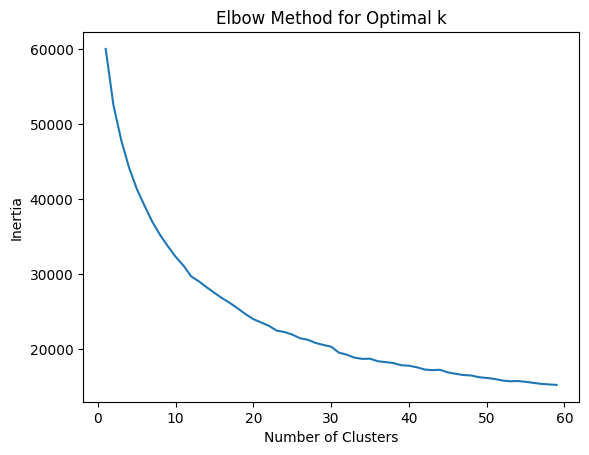

In [108]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
inertia = []
for k in range(1, 60):  # Test k values from 1 to 10
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 60), inertia)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

k=2, Silhouette Score=0.12411025941268561
k=3, Silhouette Score=0.11162899667994239
k=4, Silhouette Score=0.11721062530781673
k=5, Silhouette Score=0.1171114706764082
k=6, Silhouette Score=0.11913355423416547
k=7, Silhouette Score=0.12366909968281363
k=8, Silhouette Score=0.12277341632079265
k=9, Silhouette Score=0.12432505462846576
k=10, Silhouette Score=0.12797235270395202
k=11, Silhouette Score=0.13540044514617422
k=12, Silhouette Score=0.1385839300453515
k=13, Silhouette Score=0.13735645164501378
k=14, Silhouette Score=0.13555244016162182
k=15, Silhouette Score=0.1344443917678548
k=16, Silhouette Score=0.1347141104392576
k=17, Silhouette Score=0.1356971354720686
k=18, Silhouette Score=0.13998558555956597
k=19, Silhouette Score=0.1437314859310275
k=20, Silhouette Score=0.14560165259485822
k=21, Silhouette Score=0.14733131326293852
k=22, Silhouette Score=0.14533426855933998
k=23, Silhouette Score=0.14456937834734881
k=24, Silhouette Score=0.14661188585560767
k=25, Silhouette Score=0.

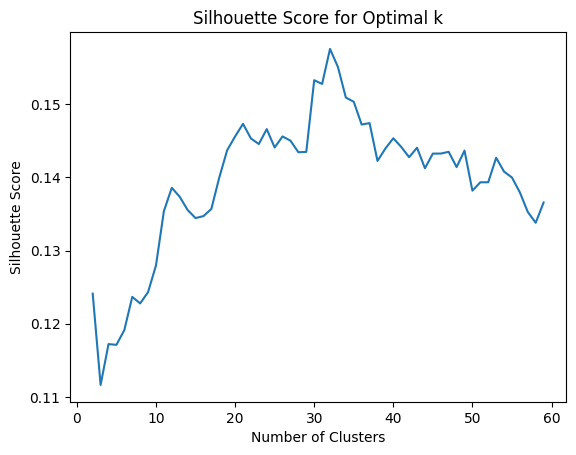

In [107]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 60):  # Test k values from 2 to 39
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    score = silhouette_score(scaled_nutritional_data, kmeans.labels_)
    sil_scores.append(score)
    print(f'k={k}, Silhouette Score={score}')

# Plotting the silhouette scores
plt.plot(range(2, 60), sil_scores)
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [126]:
# Calculate the silhouette score
sil_score = silhouette_score(df_selected, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.2636821664026632


In [113]:
# Apply KMeans clustering (without scaling)
kmeans = KMeans(n_clusters=32, random_state=42)
kmeans.fit(df_selected)

# Get the cluster labels and add them to the dataframe using .loc
df_selected.loc[:, 'Cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with the cluster labels
print(df_selected.head())



   Calories (kcal)  Protein (g)  Carbohydrates (g)  Fat (g)  Fiber (g)  \
0              173         42.4               83.7      1.5        1.5   
1               66         39.2               13.8      3.2        2.6   
2              226         27.1               79.1     25.8        3.2   
3              116         43.4               47.1     16.1        6.5   
4              500         33.9               75.8     47.0        7.8   

   Sugars (g)  Cluster  
0        12.7        5  
1        12.2       27  
2        44.7       16  
3        44.1       11  
4        19.4       25  


C:\Users\tomas\AppData\Local\Temp\ipykernel_5932\4044215762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Cluster'] = kmeans.labels_


C:\Users\tomas\AppData\Local\Temp\ipykernel_5932\2385502644.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = kmeans.labels_
C:\Users\tomas\AppData\Local\Temp\ipykernel_5932\2385502644.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['PCA1'] = pca_components[:, 0]
C:\Users\tomas\AppData\Local\Temp\ipykernel_5932\2385502644.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

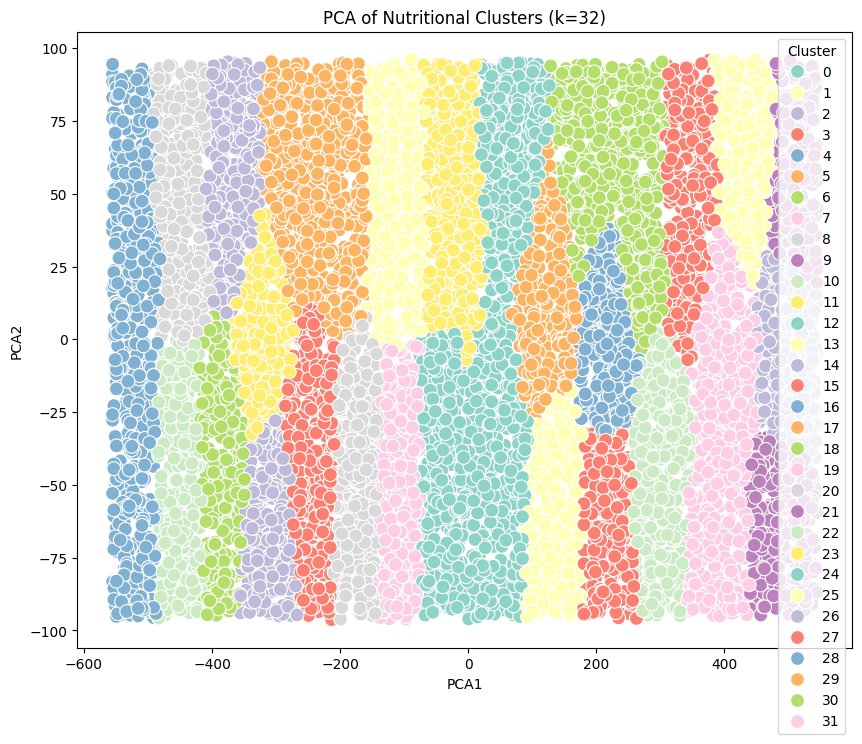

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Apply KMeans clustering with 32 clusters
kmeans = KMeans(n_clusters=32, random_state=42)
kmeans.fit(df_selected)

# Add the cluster labels to the dataframe
df_selected['Cluster'] = kmeans.labels_

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_selected)

# Add the PCA components to the DataFrame
df_selected['PCA1'] = pca_components[:, 0]
df_selected['PCA2'] = pca_components[:, 1]

# Create a color palette with 32 colors
palette = sns.color_palette("Set3", n_colors=32)  # Set3 palette can handle 32 colors

# Plot the clusters with the updated color palette
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette=palette, data=df_selected, s=100)
plt.title('PCA of Nutritional Clusters (k=32)')
plt.show()


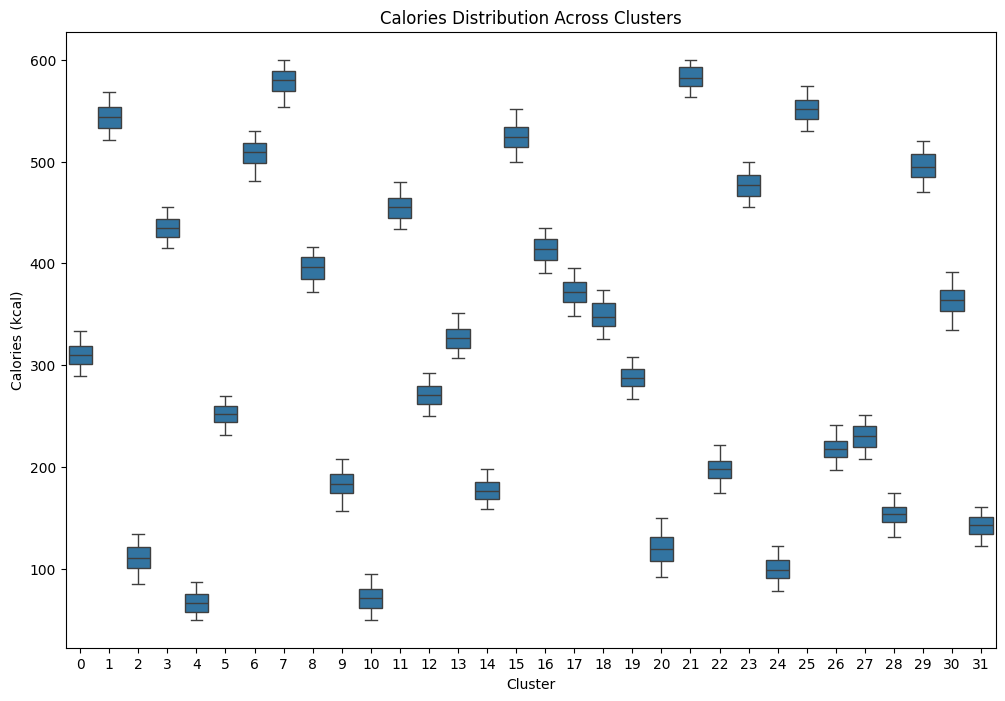

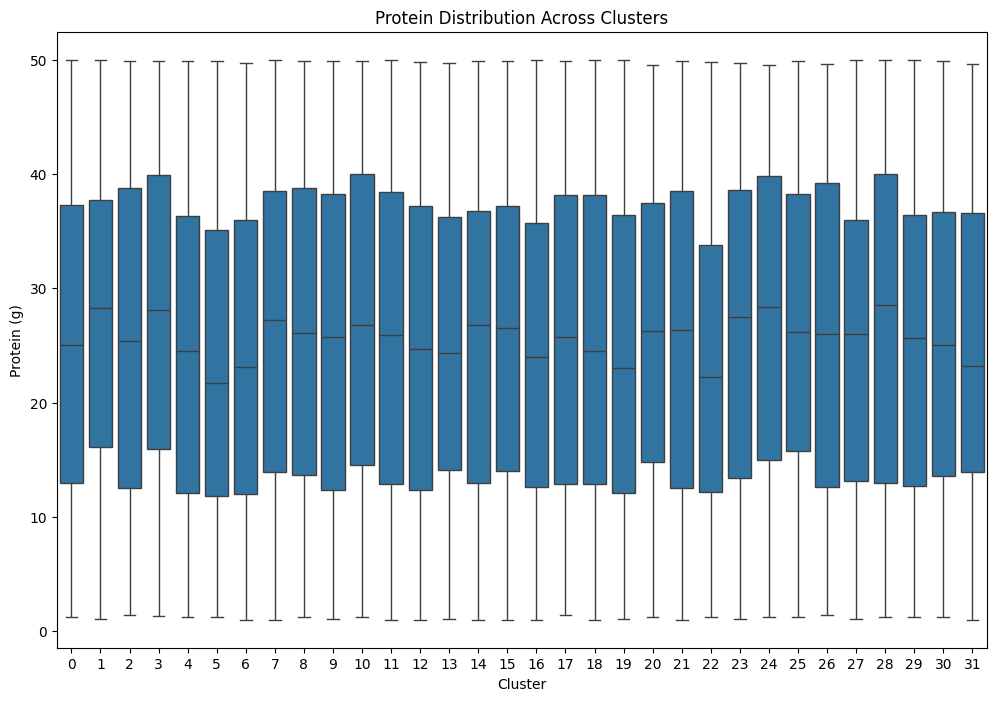

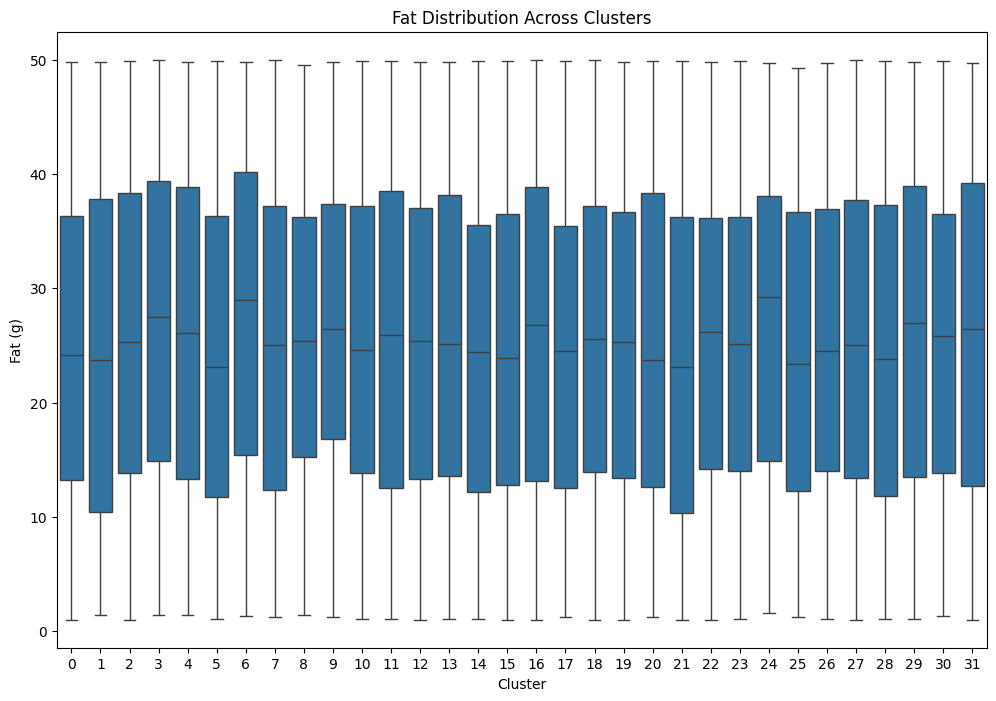

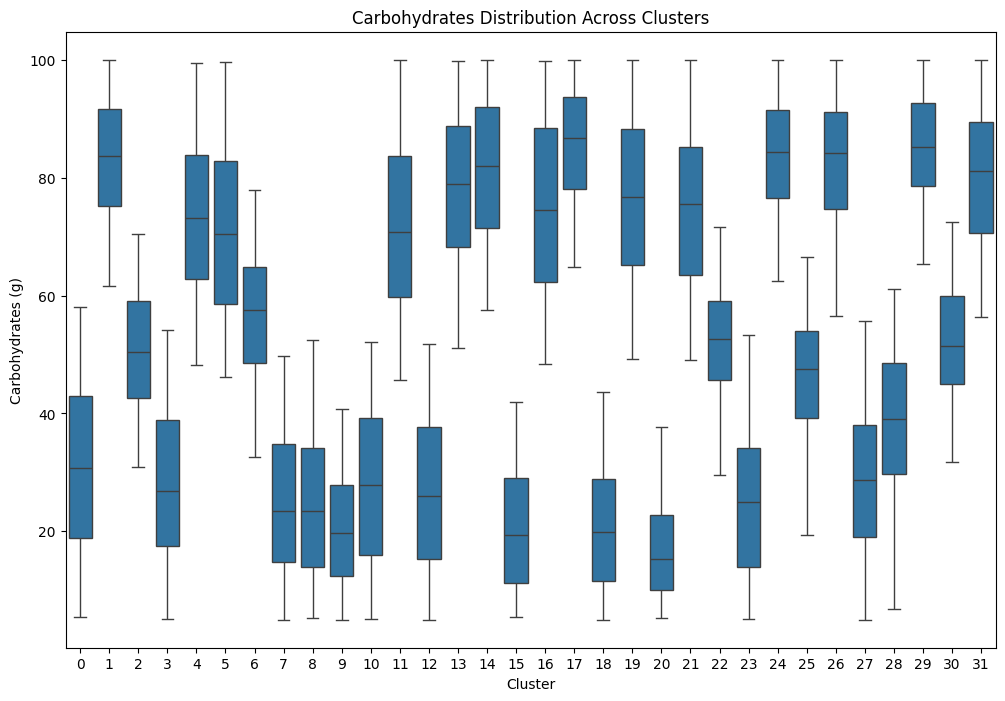

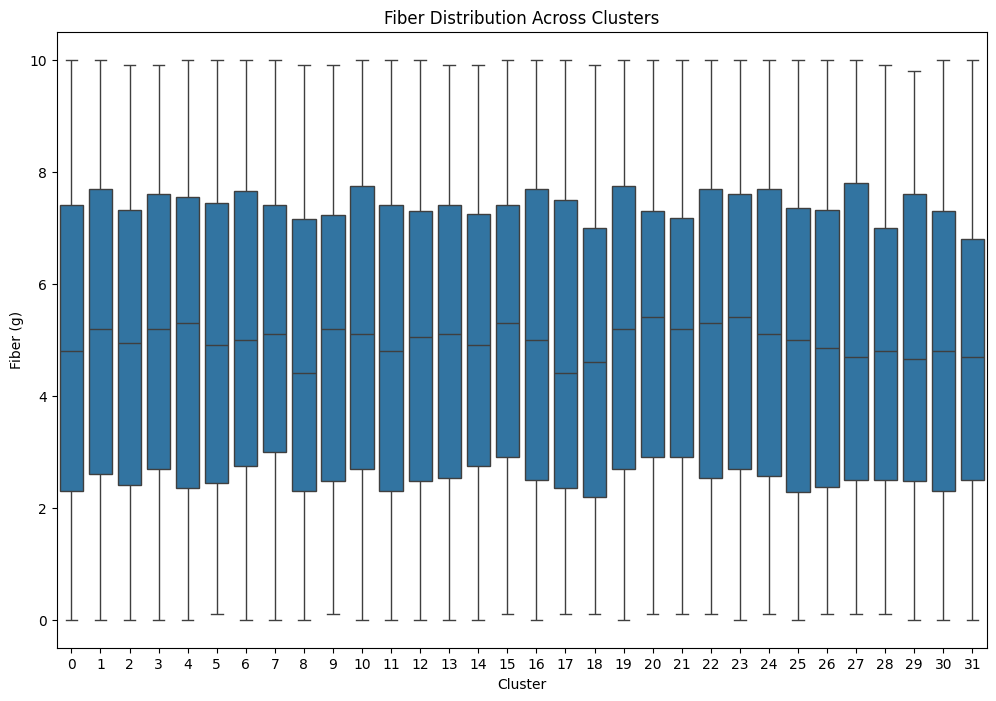

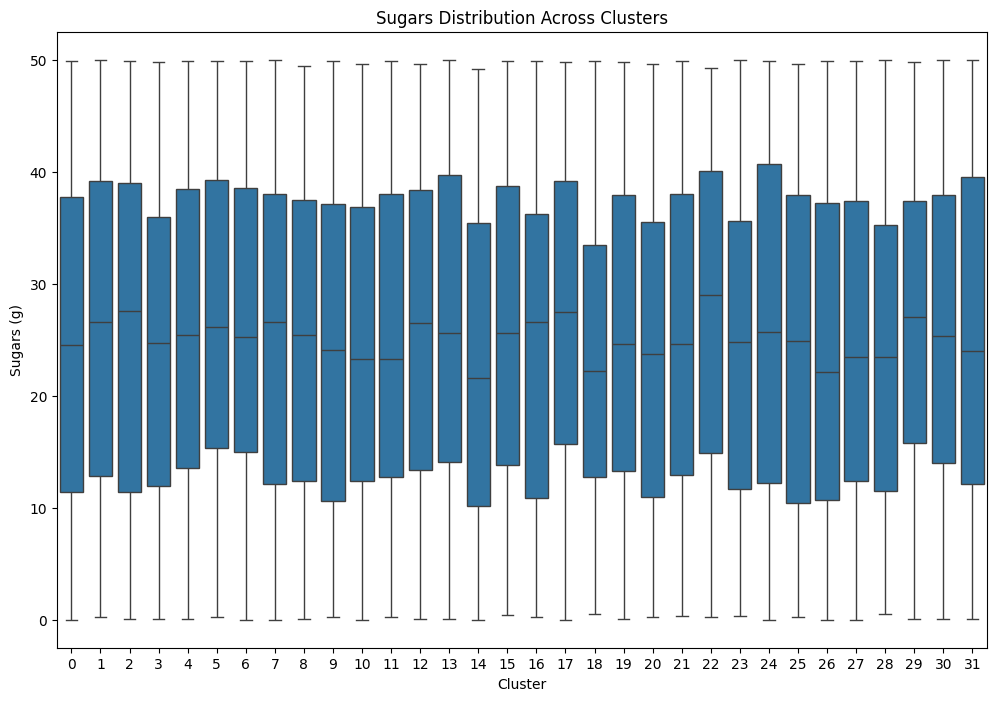

In [116]:
# Ensure 'Cluster' column is in the dataset and we are using the right DataFrame (df_selected with clusters)
# Plot the distribution of key nutritional features across clusters
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Calories (kcal)', data=df_selected)
plt.title('Calories Distribution Across Clusters')
plt.show()

# Repeat for Protein
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Protein (g)', data=df_selected)
plt.title('Protein Distribution Across Clusters')
plt.show()

# Repeat for Fat
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Fat (g)', data=df_selected)
plt.title('Fat Distribution Across Clusters')
plt.show()

# Repeat for Carbohydrates
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Carbohydrates (g)', data=df_selected)
plt.title('Carbohydrates Distribution Across Clusters')
plt.show()

# Repeat for Fiber
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Fiber (g)', data=df_selected)
plt.title('Fiber Distribution Across Clusters')
plt.show()

# Repeat for Sugars
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Sugars (g)', data=df_selected)
plt.title('Sugars Distribution Across Clusters')
plt.show()
